In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
plt.rcParams['figure.figsize']=(10,15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223614ACBE0>,
      dtype=object)

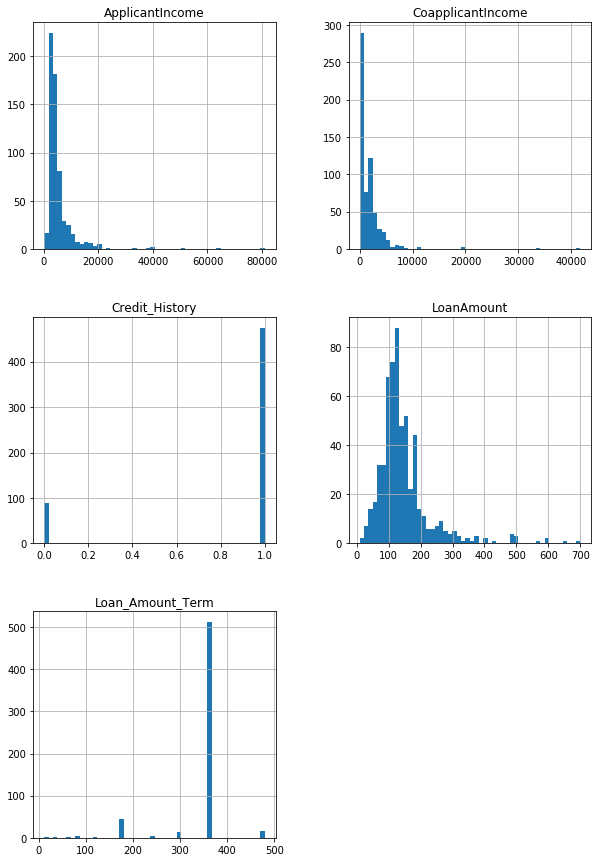

In [7]:
df.hist(bins=50)

In [8]:
df['LoanAmount'].median()

128.0

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
convert=['Gender','Married','Education','Dependents','Self_Employed','Loan_Status','Property_Area']

In [12]:
le=LabelEncoder()

In [39]:
for m in convert:
    df[m]=le.fit_transform(df[m].values.reshape(-1,1))

In [14]:
imp=SimpleImputer(strategy='most_frequent')

In [15]:
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))

In [16]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))

In [19]:
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))

In [20]:
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [21]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
imp_median=SimpleImputer(strategy='median')

In [23]:
df['LoanAmount']=imp_median.fit_transform(df['LoanAmount'].values.reshape(-1,1))

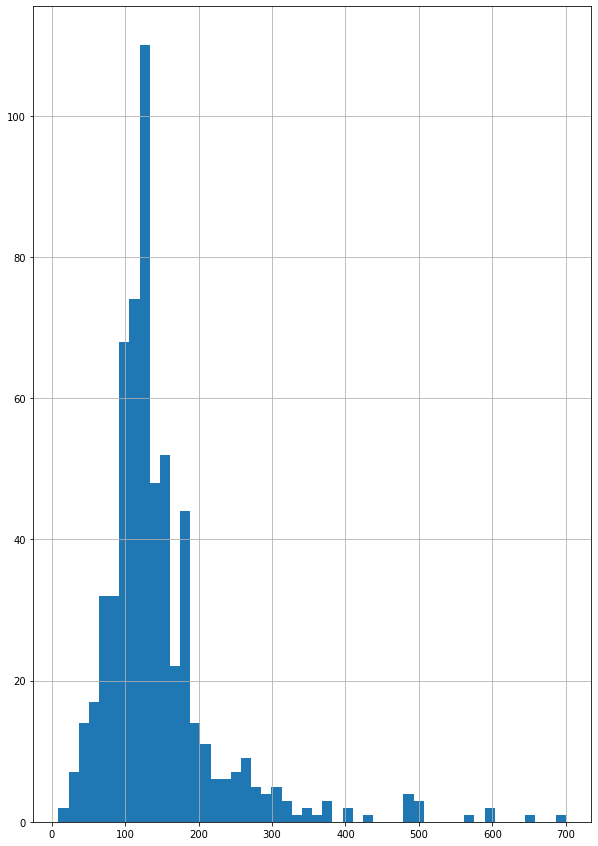

In [24]:
df['LoanAmount'].hist(bins=50)

In [25]:
imp_mean=SimpleImputer(strategy='mean')

In [26]:
df['Loan_Amount_Term']=imp_mean.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [28]:
yes=df['Loan_Status']=='Y'

In [29]:
no=df['Loan_Status']=='N'

In [30]:
df[yes].shape

(422, 12)

In [31]:
df[no].shape

(192, 12)

In [32]:
df.shape

(614, 12)

In [33]:
df=df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223621B25C0>,
      dtype=object)

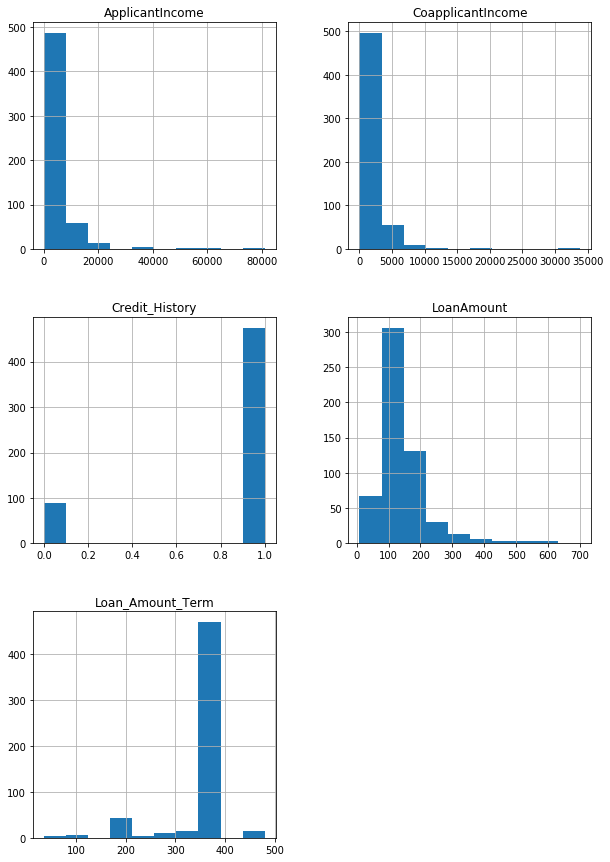

In [34]:
df.hist()

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
df=df.astype(float)

In [41]:
x=df.iloc[:,0:-1]

In [42]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [43]:
sm=SMOTETomek(random_state=42)

In [44]:
x,y=sm.fit_sample(x,y)

In [45]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [46]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.820922,0.647163,0.751773,0.214539,0.132979,5466.436170,1530.448440,144.452128,342.148936,0.842199,1.030142,0.682624
std,0.383758,0.478277,1.017824,0.410867,0.339853,6271.344106,2471.721359,81.805055,63.778194,0.364878,0.784494,0.465868
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2892.750000,0.000000,101.750000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3815.000000,1105.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5803.750000,2250.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [48]:
lr=LogisticRegression()

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [50]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
lr.score(xtrain,ytrain)

0.7560483870967742

In [52]:
pred=lr.predict(xtest)

In [53]:
accuracy_score(pred,ytest)

0.7168674698795181

In [54]:
dtc=DecisionTreeClassifier()

In [55]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
predtc=dtc.predict(xtest)

In [57]:
accuracy_score(predtc,ytest)

0.7710843373493976

In [58]:
rfr=RandomForestClassifier()

In [59]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
predr=rfr.predict(xtest)

In [61]:
accuracy_score(predr,ytest)

0.8192771084337349

In [62]:
cvr=cross_val_score(rfr,x,y,cv=15,scoring='accuracy')

In [63]:
cvr.mean()

0.8219367588932806

In [64]:
cvr.std()

0.11423323798260523

In [65]:
cvr

array([0.76086957, 0.68181818, 0.65909091, 0.75      , 0.77272727,
       0.61363636, 0.72727273, 0.88636364, 0.88636364, 0.93181818,
       0.90909091, 0.95454545, 0.88636364, 0.97727273, 0.93181818])

In [66]:
ada=AdaBoostClassifier(base_estimator=rfr)

In [67]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [68]:
preda=ada.predict(xtest)

In [69]:
accuracy_score(preda,ytest)

0.8313253012048193

In [70]:
cva=cross_val_score(ada,x,y,cv=15,scoring='accuracy')

In [71]:
cva.mean()

0.8491436100131753

In [72]:
cva.std()

0.08269963243942008

In [73]:
fraud_model=pickle.dumps(cva)